# Oxygenation Pillar Simulator
Let's break down the steps for the Oxygenation pillar:

# Step 1: Define the Healthy Ranges
For the Oxygenation pillar, the key parameters you'd typically consider might include:

Dissolved Oxygen (DO) in water reservoirs: 5-8 mg/L
For the purpose of this demonstration, we'll focus on simulating the Dissolved Oxygen (DO) levels.

# Step 2: Create the Simulator
1. Data Generation for Dissolved Oxygen (DO)

Let's create a function to generate time-series data for the DO levels. We'll simulate a "healthy" range and occasionally introduce "unhealthy" values.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

def generate_data(mean, std_dev, size=100):
    """
    Generates a series of random data points based on a normal distribution.
    
    Parameters:
    - mean (float): Mean of the distribution.
    - std_dev (float): Standard deviation of the distribution.
    - size (int): Number of data points.
    
    Returns:
    - numpy.ndarray: Array of random data points.
    """
    return np.random.normal(mean, std_dev, size)


def generate_oxygen_data():
    # Parameters for DO
    do_healthy_mean = 6.5  # Central value of the healthy range
    do_healthy_std_dev = 0.5  # Adjust for desired fluctuation

    # Generate healthy data
    do_healthy_data = generate_data(do_healthy_mean, do_healthy_std_dev, size=95)

    # Introduce some unhealthy data
    do_unhealthy_data = np.array([4, 4.5, 9, 9.5, 10])
    do_data = np.insert(do_healthy_data, [20, 40, 60, 80, 90], do_unhealthy_data)
    
    return do_data


2. Plotting the DO Data

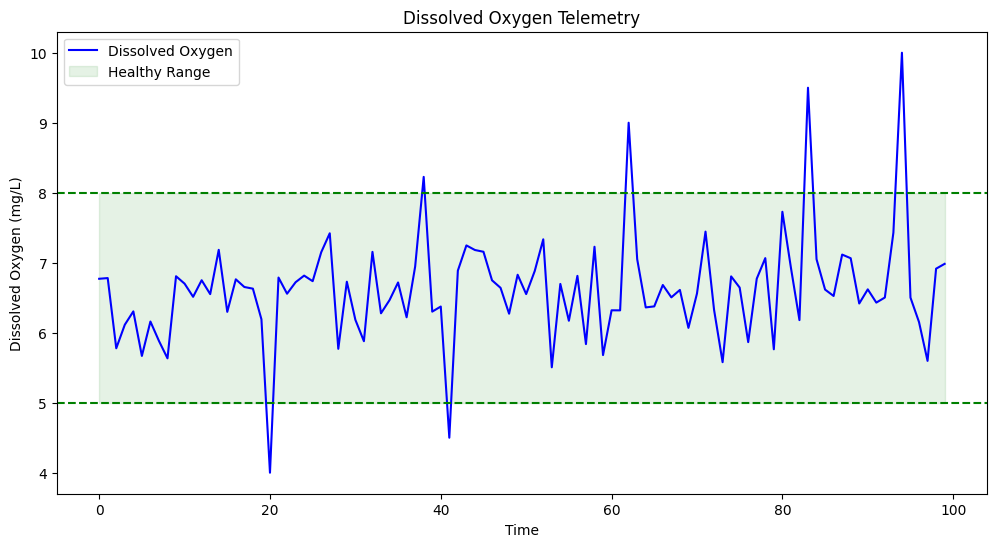

In [6]:
def plot_do_data(do_data):
    plt.figure(figsize=(12,6))
    plt.plot(do_data, label="Dissolved Oxygen", color='blue')
    plt.axhline(y=5, color='g', linestyle='--')
    plt.axhline(y=8, color='g', linestyle='--')
    plt.fill_between(range(len(do_data)), 5, 8, color='green', alpha=0.1, label='Healthy Range')
    plt.title("Dissolved Oxygen Telemetry")
    plt.ylabel("Dissolved Oxygen (mg/L)")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

do_data = generate_oxygen_data()
plot_do_data(do_data)


# 3. IoT Device and MQTT Integration

You can use the provided IoTDevice and MQTTPublisher classes to simulate a pseudo IoT device that sends telemetry data on dissolved oxygen levels to an MQTT broker.

In [9]:
import paho.mqtt.client as mqtt
import logging
import os

# Ensure the directory exists
log_dir = 'logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Configure logging
log_file = os.path.join(log_dir, 'log.txt')
logging.basicConfig(filename=log_file, level=logging.ERROR, 
                    format='%(asctime)s [%(levelname)s]: %(message)s')

class MQTTPublisher:
    """
    Represents an MQTT Publisher for version 3.11.
    
    Attributes:
    - broker (str): The address of the MQTT broker.
    - port (int): The port of the MQTT broker.
    - topic (str): The topic on which messages will be published.
    """
    
    def __init__(self, broker, port, topic):
        """
        Initializes the MQTTPublisher with broker details and topic.
        
        Args:
        - broker (str): The address of the MQTT broker.
        - port (int): The port of the MQTT broker.
        - topic (str): The topic on which messages will be published.
        """
        self.broker = broker
        self.port = port
        self.topic = topic
        self.client = mqtt.Client()

        # Set callback functions for successful and unsuccessful connection
        self.client.on_connect = self._on_connect
        self.client.on_disconnect = self._on_disconnect
        
    def _on_connect(self, client, userdata, flags, rc):
        """
        Callback for when the client successfully connects to the broker.
        """
        if rc == 0:
            logging.info("Connected successfully to MQTT broker.")
        else:
            logging.error(f"Connection failed with error code: {rc}")
            
    def _on_disconnect(self, client, userdata, rc):
        """
        Callback for when the client disconnects from the broker.
        """
        if rc != 0:
            logging.warning("Unexpected disconnection from MQTT broker.")
        
    def connect(self):
        """
        Connects to the MQTT broker.
        """
        try:
            self.client.connect(self.broker, self.port)
        except Exception as e:
            logging.error(f"Error connecting to MQTT broker: {e}")
            
    def disconnect(self):
        """
        Disconnects from the MQTT broker.
        """
        try:
            self.client.disconnect()
        except Exception as e:
            logging.error(f"Error disconnecting from MQTT broker: {e}")
            
    def publish(self, message):
        """
        Publishes a message to the specified topic.
        
        Args:
        - message (str): The message to be published.
        """
        try:
            result = self.client.publish(self.topic, message)
            
            # Check if the publish was successful
            if result.rc != mqtt.MQTT_ERR_SUCCESS:
                logging.error(f"Failed to send message: {message}")
        except Exception as e:
            logging.error(f"Error publishing message: {e}")

# Usage example:
# publisher = MQTTPublisher(broker="your_broker_address", port=1883, topic="plant/telemetry")
# publisher.connect()
# publisher.publish('{"oxygenation": 8.5}')
# publisher.disconnect()


In [11]:
class IoTDevice:
    """
    Represents a base class for an IoT device responsible for monitoring plant conditions.
    
    Attributes:
    - device_id (str): Unique identifier for the device.
    - location (str): Location where the device is placed.
    - telemetry_data (dict): Stores the telemetry data of the device.
    - status (str): Represents the connectivity status of the device. Can be 'online' or 'offline'.
    """
    def __init__(self, device_id, location):
        """
        Initializes the IoTDevice with a device ID and location.
        
        Args:
        - device_id (str): Unique identifier for the device.
        - location (str): Location where the device is placed.
        """
        self.device_id = device_id
        self.location = location
        self.telemetry_data = {}
        self.status = "offline"
    def connect(self):
        """
        Connects the device, changing its status to 'online'.
        """
        self.status = "online"
    def disconnect(self):
        """
        Disconnects the device, changing its status to 'offline'.
        """
        self.status = "offline"
    def send_telemetry(self, data):
        """
        Sends telemetry data from the device, typically to an external server or database.
        
        Args:
        - data (dict): Telemetry data to be sent.
        
        Note: 
        Actual logic to send telemetry data (e.g., via MQTT) should be implemented.
        """
        # Logic to send telemetry data, e.g., via MQTT
        pass
        
    def simulate_telemetry(self):
        """
        Simulates telemetry data for the device. 
        This method can be overridden by subclasses to provide specific simulation logic.
        """
        # Base simulation logic (can be overridden by subclasses)
        pass


In [12]:
# Define the MQTT publisher
publisher = MQTTPublisher(broker="your_broker_address", port=1883, topic="plant/oxygenation")

# Extend the IoTDevice class for Oxygenation
class OxygenationDevice(IoTDevice):
    def simulate_telemetry(self):
        return {"dissolved_oxygen": np.random.choice(generate_oxygen_data())}

# Simulate sending DO data
device = OxygenationDevice(device_id="OXY01", location="Greenhouse A")
device.connect()

for _ in range(100):
    telemetry = device.simulate_telemetry()
    publisher.publish(str(telemetry))

device.disconnect()


Step 3: Plotting for your Jupyter Notebooks
For an interactive demonstration:

In [14]:
# Define the "healthy" and “Unhealthy” ranges for Dissolved Oxygen
do_healthy_mean = 8  # Central value of the healthy range
do_healthy_std_dev = 0.5  # Adjust for desired fluctuation

def generate_do_data():
    # Generate healthy data
    data = generate_data(do_healthy_mean, do_healthy_std_dev, size=95)
    unhealthy_data = np.array([4, 4.5, 4, 4.5, 4])  # Some example unhealthy values
    full_data = np.insert(data, range(20, 25), unhealthy_data)
    return full_data

def plot_do_data(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.axhline(y=5, color='r', linestyle='--')
    plt.axhline(y=9, color='r', linestyle='--')
    plt.title("Dissolved Oxygen Telemetry")
    plt.ylabel("Dissolved Oxygen (mg/L)")
    plt.xlabel("Time")
    plt.show()

def update_do_plot(shock_value):
    data = generate_data(do_healthy_mean, do_healthy_std_dev, size=95)
    unhealthy_data = np.array([shock_value]*5)
    full_data = np.insert(data, range(20, 25), unhealthy_data)
    plot_do_data(full_data)

import ipywidgets as widgets
widgets.interact(update_do_plot, shock_value=widgets.FloatSlider(value=9, min=4, max=10, step=0.1, description='Shock DO:'))


interactive(children=(FloatSlider(value=9.0, description='Shock DO:', max=10.0, min=4.0), Output()), _dom_clas…

<function __main__.update_do_plot(shock_value)>